In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import random
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# df=pd.read_csv('/kaggle/input/TechElectroCustomerData/data.csv')
# df.head()

In [4]:
random.seed(42)
Customer_ID = []
age = []
gender = []
MaritalStatuss = []
AnnualIncome = []
TotalPurchase = []
PreferedCategory = []

In [5]:
for CustomerIDs in range(1001, 1501):
    Customer_ID.append(CustomerIDs)
    age.append(random.randint(18, 65))
    gender.append(random.choice(['Male', 'Female']))
    MaritalStatuss.append(random.choice(['Married', 'Single', 'Divorced']))
    AnnualIncome.append(random.randint(25000, 90000))
    TotalPurchase.append(random.randint(18, 90))
    PreferedCategory.append(random.choice(['Electronics', 'Appliances']))

In [6]:
data = {
    'CustomerID': Customer_ID,
    'Age': age,
    'Gender': gender,
    'MaritalStatus': MaritalStatuss,
    'AnnualIncome (USD)': AnnualIncome,
    'TotalPurchases': TotalPurchase,
    'PreferredCategory': PreferedCategory
}

In [7]:
df = pd.DataFrame(data)
df.to_csv('TechElectroCustomerData.csv', index=False)

In [8]:
df.head()

,CustomerID,Age,Gender,MaritalStatus,AnnualIncome (USD),TotalPurchases,PreferredCategory
0,1001,58,Male,Married,73598,53,Electronics
1,1002,32,Male,Divorced,31717,87,Electronics
2,1003,55,Female,Married,26952,29,Electronics
3,1004,32,Male,Divorced,38031,87,Appliances
4,1005,32,Female,Divorced,43231,18,Electronics


In [9]:
num_cols = ['Age', 'AnnualIncome (USD)', 'TotalPurchases']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [10]:
l = LabelEncoder()
df['Gender'] = l.fit_transform(df['Gender'])
df['MaritalStatus'] = l.fit_transform(df['MaritalStatus'])
df['PreferredCategory'] = l.fit_transform(df['PreferredCategory'])

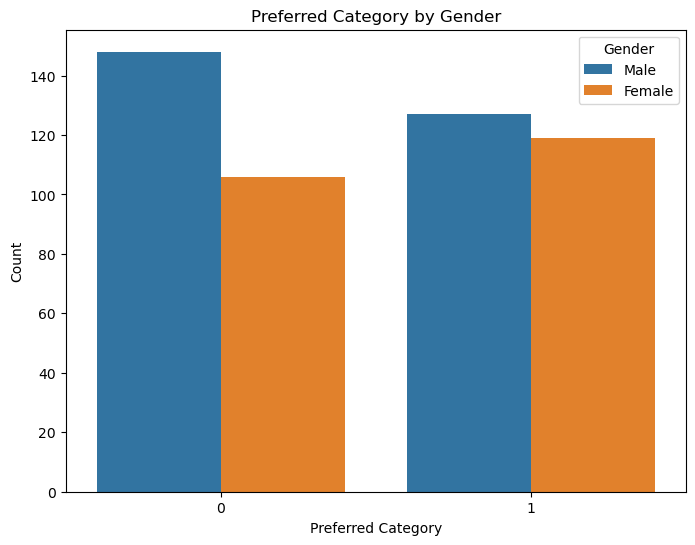

In [11]:
#Exploratory Data Analysis
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PreferredCategory', hue='Gender')
plt.title('Preferred Category by Gender')
plt.xlabel('Preferred Category')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])
plt.show()

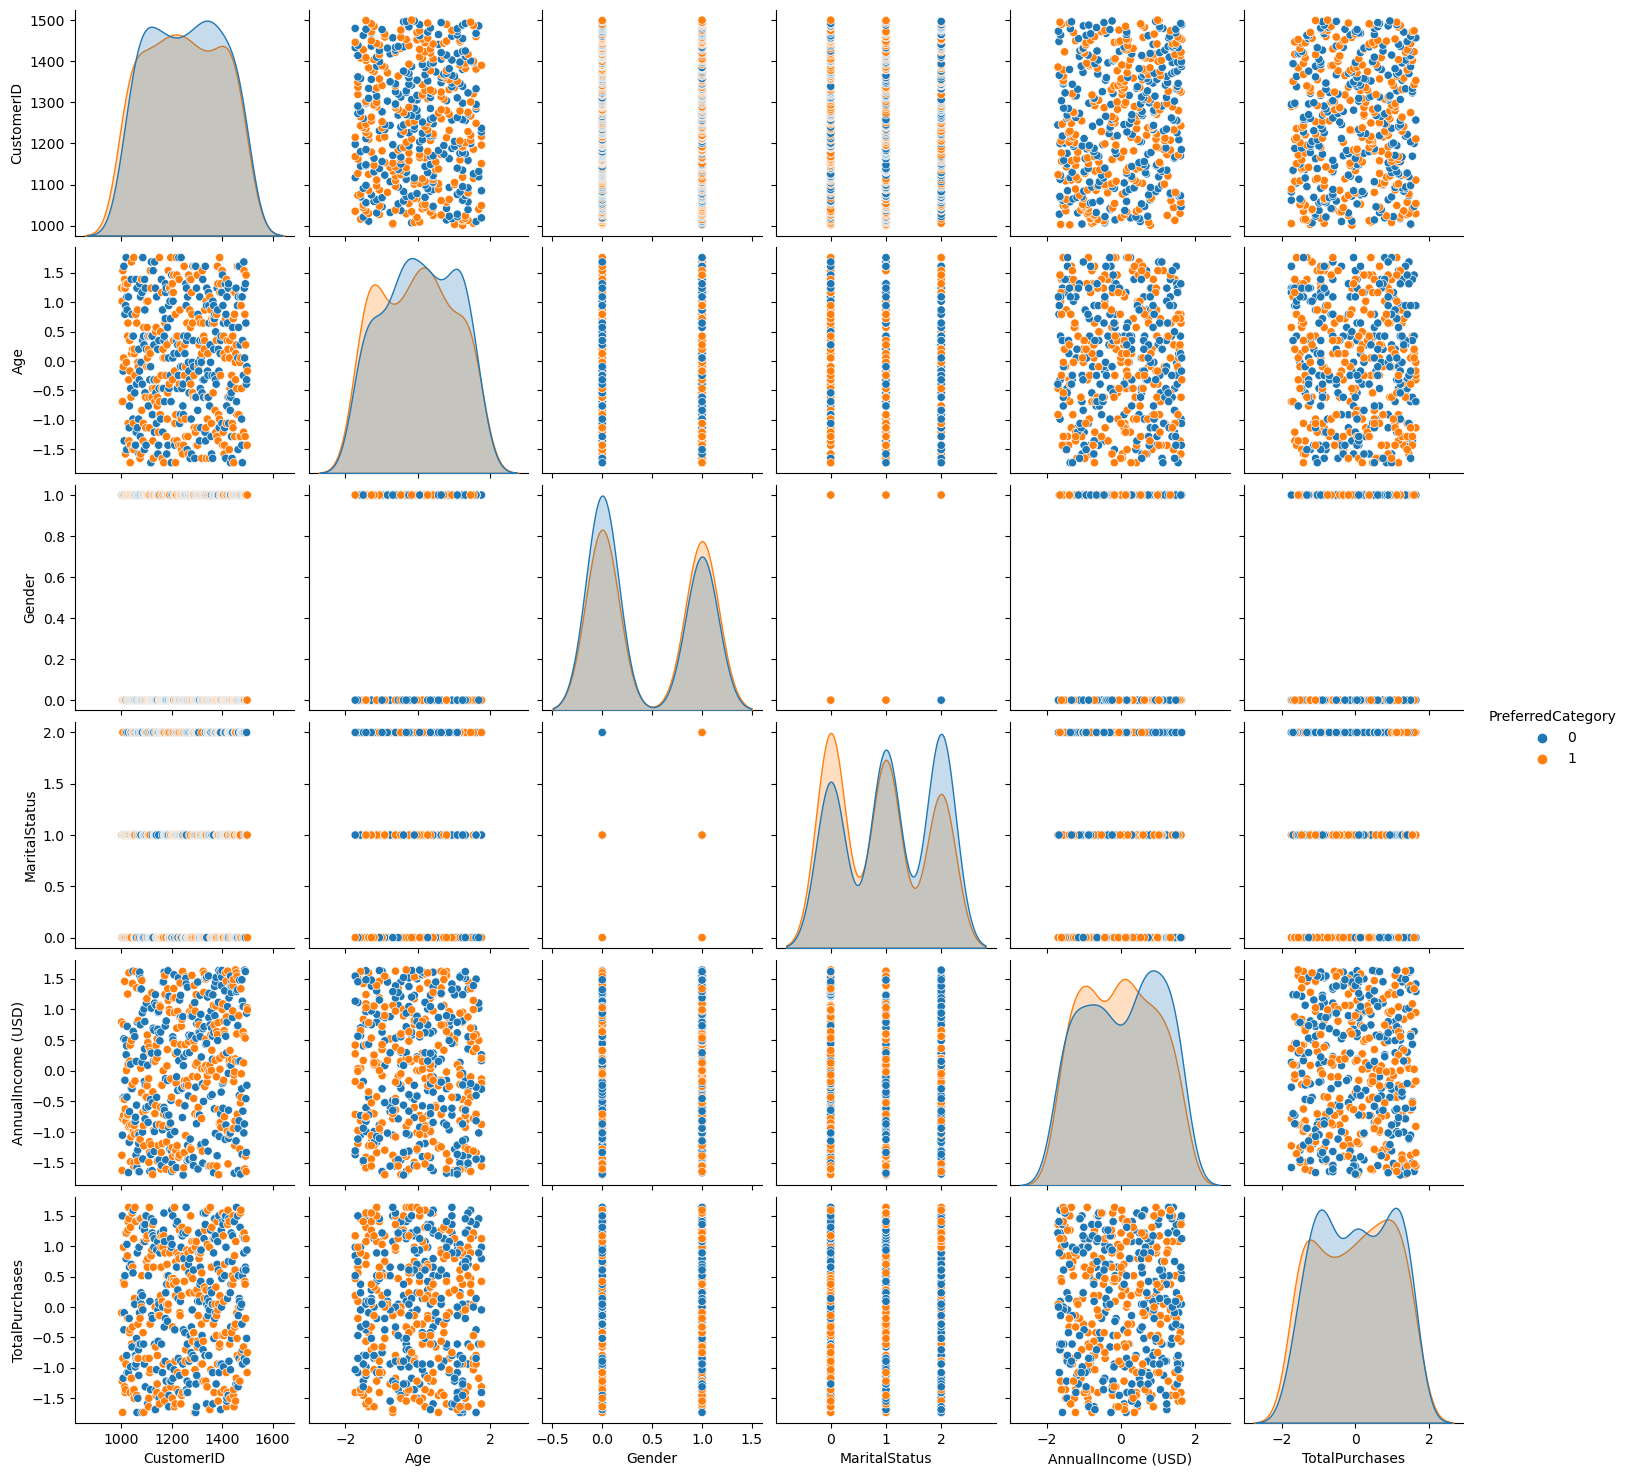

In [12]:
# Pairplot for visualizing relationships
sns.pairplot(df, hue='PreferredCategory')
plt.show()

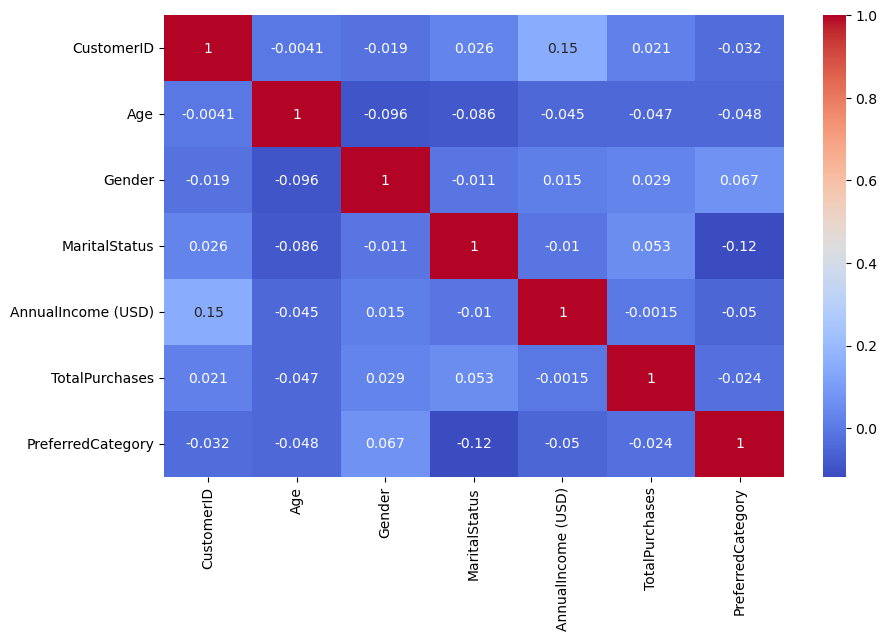

In [13]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

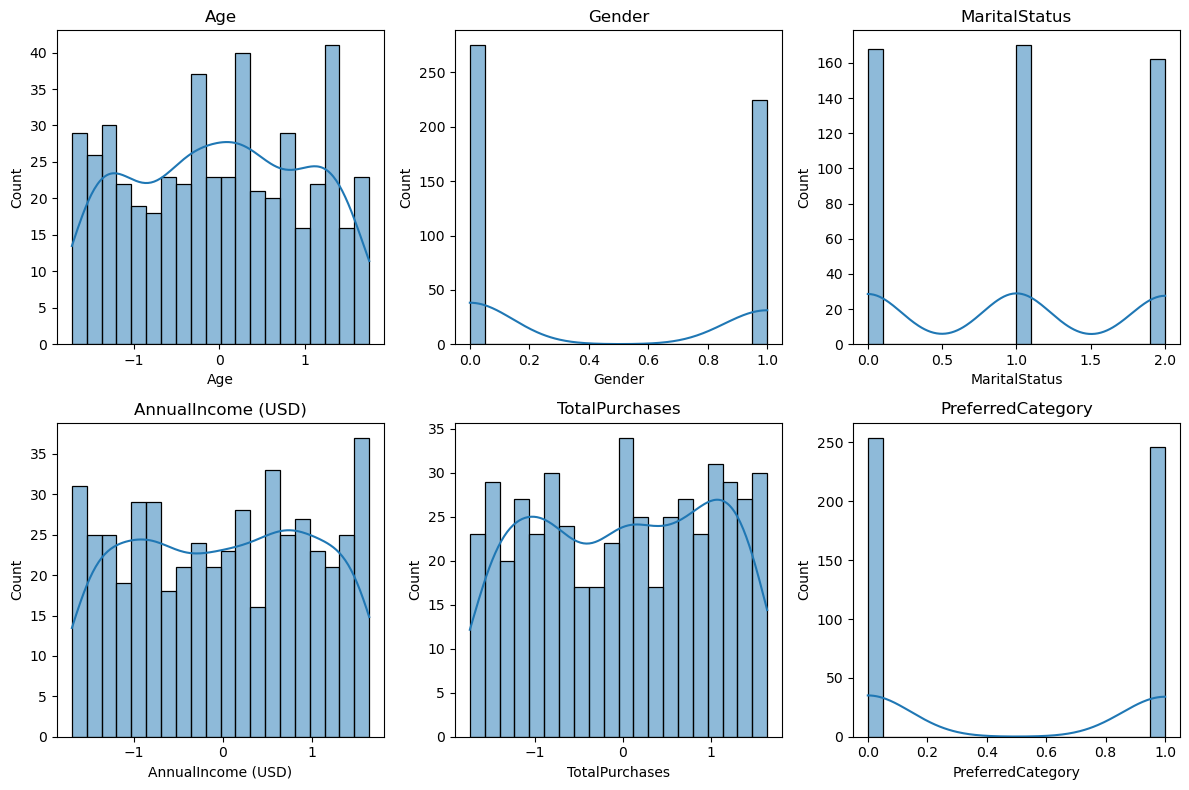

In [14]:
# Distribution plots for numerical features
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[1:]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

In [15]:
# Feature scaling/normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.drop(['CustomerID'], axis=1))

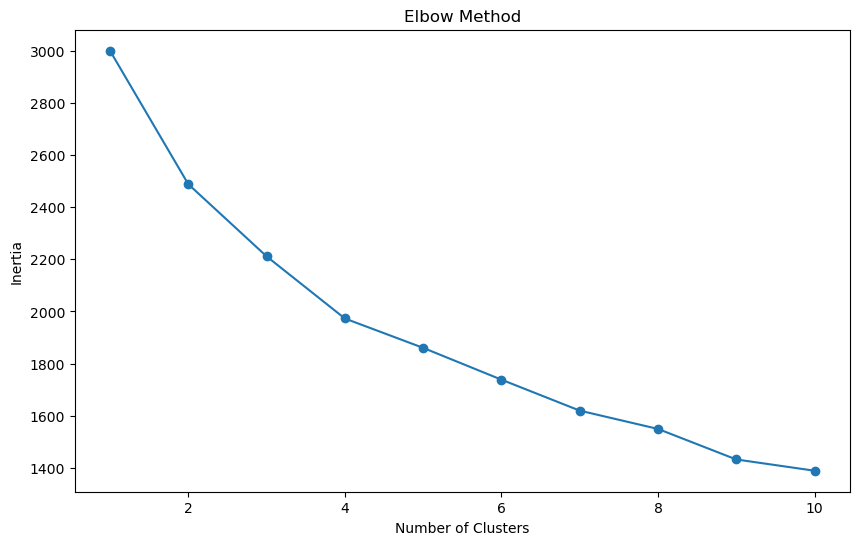

In [18]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow method, choose the optimal number of clusters
optimal_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)
